# Anomaly detection

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
raw_data = pd.read_csv("../data/collected/SeraphimDroidRecord-2019-07-06-19-03-13.csv",header = 1)

In [40]:
raw_data.head()

,Total CPU usage (%),AnotherMonitor Memory (kB),Memory used (kB),Memory available (MemFree+Cached) (kB),MemFree (kB),Cached (kB),mycpu
0,10.354223,5004,765636,784912,318688,466224,1.907357
1,12.295082,5004,766268,784280,317820,466460,3.825137
2,9.668509,5004,777016,773532,272176,501356,1.381216
3,5.835544,5004,777032,773516,272284,501356,1.326260
4,1.891892,5004,777276,773272,271920,501352,1.351351


(array([159., 150.,  81.,  66.,  86.,  94.,  93.,  60.,  55.,  45.,  46.,
         80.,  85., 103.,  95.,  83.,  56.,  51.,  41.,  33.,  22.,  13.,
         26.,  11.,  12.,  10.,   8.,  11.,   5.,   5.,   4.,   3.,   2.,
          5.,   4.,  10.,   4.,   5.,   4.,   2.]),
 array([ 0.        ,  1.73796788,  3.47593575,  5.21390363,  6.9518715 ,
         8.68983938, 10.42780725, 12.16577512, 13.903743  , 15.64171088,
        17.37967875, 19.11764662, 20.8556145 , 22.59358238, 24.33155025,
        26.06951813, 27.807486  , 29.54545387, 31.28342175, 33.02138962,
        34.7593575 , 36.49732538, 38.23529325, 39.97326113, 41.711229  ,
        43.44919687, 45.18716475, 46.92513263, 48.6631005 , 50.40106838,
        52.13903625, 53.87700412, 55.614972  , 57.35293988, 59.09090775,
        60.82887563, 62.5668435 , 64.30481137, 66.04277925, 67.78074713,
        69.518715  ]),
 <a list of 40 Patch objects>)

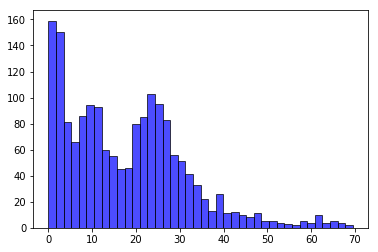

In [19]:
plt.figure()
plt.hist(raw_data['Total CPU usage (%)'], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

In [20]:
raw_data = raw_data.drop(['Unnamed: 3','Threshold (kB)'],axis=1)
raw_data.head()

,Total CPU usage (%),AnotherMonitor (Pid 6912) CPU usage (%),AnotherMonitor Memory (kB),Memory used (kB),Memory available (MemFree+Cached) (kB),MemFree (kB),Cached (kB)
0,10.354223,1.907357,5004,765636,784912,318688,466224
1,12.295082,3.825137,5004,766268,784280,317820,466460
2,9.668509,1.381216,5004,777016,773532,272176,501356
3,5.835544,1.326260,5004,777032,773516,272284,501356
4,1.891892,1.351351,5004,777276,773272,271920,501352


In [22]:
raw_data['mycpu'] = raw_data['AnotherMonitor (Pid 6912) CPU usage (%)']
raw_data = raw_data.drop(['AnotherMonitor (Pid 6912) CPU usage (%)'],axis=1)

In [23]:
memory_avail = raw_data['Memory available (MemFree+Cached) (kB)']
memfree = raw_data['MemFree (kB)']
total_cpu = raw_data['Total CPU usage (%)']
SeraphimDroid = raw_data['mycpu']
Cached = raw_data['Cached (kB)']

(array([159., 150.,  81.,  66.,  86.,  94.,  93.,  60.,  55.,  45.,  46.,
         80.,  85., 103.,  95.,  83.,  56.,  51.,  41.,  33.,  22.,  13.,
         26.,  11.,  12.,  10.,   8.,  11.,   5.,   5.,   4.,   3.,   2.,
          5.,   4.,  10.,   4.,   5.,   4.,   2.]),
 array([ 0.        ,  1.73796788,  3.47593575,  5.21390363,  6.9518715 ,
         8.68983938, 10.42780725, 12.16577512, 13.903743  , 15.64171088,
        17.37967875, 19.11764662, 20.8556145 , 22.59358238, 24.33155025,
        26.06951813, 27.807486  , 29.54545387, 31.28342175, 33.02138962,
        34.7593575 , 36.49732538, 38.23529325, 39.97326113, 41.711229  ,
        43.44919687, 45.18716475, 46.92513263, 48.6631005 , 50.40106838,
        52.13903625, 53.87700412, 55.614972  , 57.35293988, 59.09090775,
        60.82887563, 62.5668435 , 64.30481137, 66.04277925, 67.78074713,
        69.518715  ]),
 <a list of 40 Patch objects>)

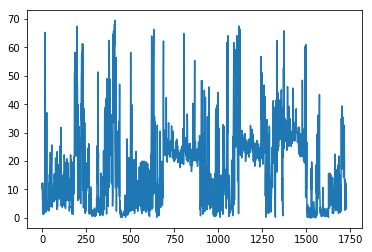

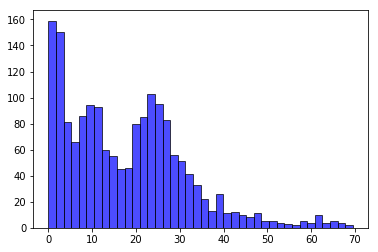

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(total_cpu)
plt.figure()
plt.hist(total_cpu, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

(array([  1.,   0.,  15.,  77.,  18., 148., 121., 469., 293., 194.,  63.,
         34.,  39.,  69.,  24.,  45.,  54.,   4.,   7.,   1.,   3.,   8.,
         25.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,
          1.,   0.,   0.,   1.,   5.,   2.,   4.]),
 array([171308. , 184505.9, 197703.8, 210901.7, 224099.6, 237297.5,
        250495.4, 263693.3, 276891.2, 290089.1, 303287. , 316484.9,
        329682.8, 342880.7, 356078.6, 369276.5, 382474.4, 395672.3,
        408870.2, 422068.1, 435266. , 448463.9, 461661.8, 474859.7,
        488057.6, 501255.5, 514453.4, 527651.3, 540849.2, 554047.1,
        567245. , 580442.9, 593640.8, 606838.7, 620036.6, 633234.5,
        646432.4, 659630.3, 672828.2, 686026.1, 699224. ]),
 <a list of 40 Patch objects>)

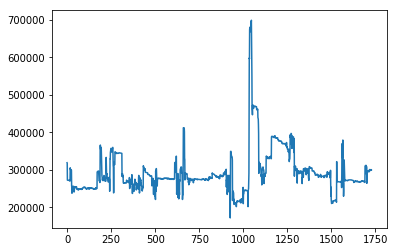

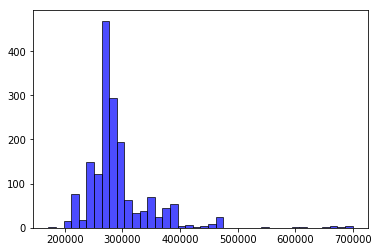

In [25]:
plt.figure()
plt.plot(memfree)
plt.figure()
plt.hist(memfree, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

(array([1.265e+03, 3.230e+02, 5.100e+01, 2.700e+01, 1.100e+01, 4.000e+00,
        0.000e+00, 6.000e+00, 3.000e+00, 1.000e+00, 6.000e+00, 1.000e+01,
        1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.        , 0.18087855, 0.3617571 , 0.54263565, 0.7235142 ,
        0.90439275, 1.0852713 , 1.26614985, 1.4470284 , 1.62790695,
        1.8087855 , 1.98966405, 2.1705426 , 2.35142115, 2.5322997 ,
        2.71317825, 2.8940568 , 3.07493535, 3.2558139 , 3.43669245,
        3.617571  , 3.79844955, 3.9793281 , 4.16020665, 4.3410852 ,
        4.52196375, 4.7028423 , 4.88372085, 5.0645994 , 5.24547795,
        5.4263565 , 5.60723505, 5.7881136 , 5.96899215, 6.1498707 ,
        6.33074925, 6.5116

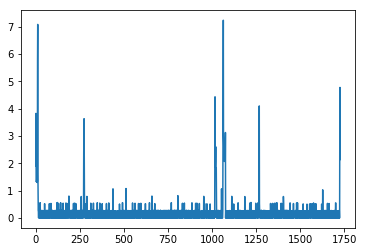

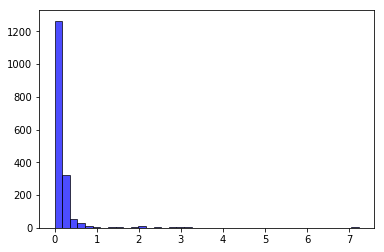

In [26]:
plt.figure()
plt.plot(SeraphimDroid)
plt.figure()
plt.hist(SeraphimDroid, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

(array([  1.,   0.,   0.,   4.,   3.,  16.,  14.,  35., 217., 136.,  65.,
        121.,  53.,   4.,  62., 124.,  91.,  30.,  35.,  57.,   6.,  72.,
        106.,  17.,   5.,  59.,  82.,  32.,  48., 117.,  37.,  21.,   7.,
          2.,   2.,   6.,  29.,   6.,   2.,   4.]),
 array([492516. , 504944.6, 517373.2, 529801.8, 542230.4, 554659. ,
        567087.6, 579516.2, 591944.8, 604373.4, 616802. , 629230.6,
        641659.2, 654087.8, 666516.4, 678945. , 691373.6, 703802.2,
        716230.8, 728659.4, 741088. , 753516.6, 765945.2, 778373.8,
        790802.4, 803231. , 815659.6, 828088.2, 840516.8, 852945.4,
        865374. , 877802.6, 890231.2, 902659.8, 915088.4, 927517. ,
        939945.6, 952374.2, 964802.8, 977231.4, 989660. ]),
 <a list of 40 Patch objects>)

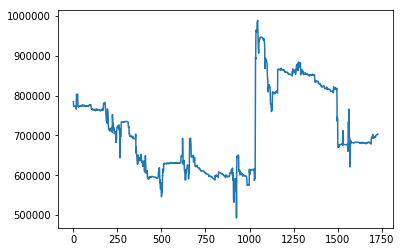

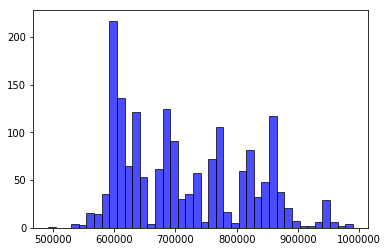

In [27]:
plt.figure()
plt.plot(memory_avail)
plt.figure()
plt.hist(memory_avail, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

(array([  7.,  18.,  16.,  20.,  57., 125.,  43.,  51.,  41.,  61., 115.,
         50.,  47.,  48.,  71.,  25.,  50., 118.,  19.,  37.,  25.,  13.,
          5.,  30.,   7.,  92.,  72.,  23.,  36.,  11.,  89.,  93.,  83.,
         29.,  19.,  30.,  29.,  14.,   7.,   2.]),
 array([274944. , 282849.9, 290755.8, 298661.7, 306567.6, 314473.5,
        322379.4, 330285.3, 338191.2, 346097.1, 354003. , 361908.9,
        369814.8, 377720.7, 385626.6, 393532.5, 401438.4, 409344.3,
        417250.2, 425156.1, 433062. , 440967.9, 448873.8, 456779.7,
        464685.6, 472591.5, 480497.4, 488403.3, 496309.2, 504215.1,
        512121. , 520026.9, 527932.8, 535838.7, 543744.6, 551650.5,
        559556.4, 567462.3, 575368.2, 583274.1, 591180. ]),
 <a list of 40 Patch objects>)

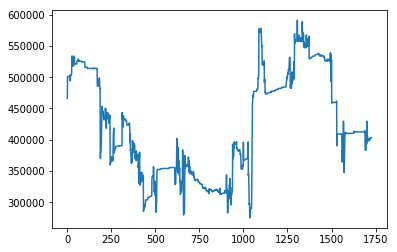

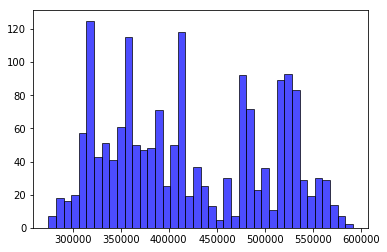

In [28]:
plt.figure()
plt.plot(Cached)
plt.figure()
plt.hist(Cached, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

In [29]:
def localoutlierfactor(data, predict, k):
    from sklearn.neighbors import LocalOutlierFactor
    clf = LocalOutlierFactor(n_neighbors=k + 1, algorithm='auto', contamination=0.1, n_jobs=-1)
    clf.fit(data)
    # 记录 k 邻域距离
    predict['k distances'] = clf.kneighbors(predict)[0].max(axis=1)
    # 记录 LOF 离群因子，做相反数处理
    predict['local outlier factor'] = -clf._decision_function(predict.iloc[:, :-1])
    return predict

def plot_lof(result, method):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    plt.figure(figsize=(8, 4)).add_subplot(111)
    plt.scatter(result[result['local outlier factor'] > method].index,
                result[result['local outlier factor'] > method]['local outlier factor'], c='red', s=50,
                marker='.', alpha=None,
                label='离群点')
    plt.scatter(result[result['local outlier factor'] <= method].index,
                result[result['local outlier factor'] <= method]['local outlier factor'], c='black', s=50,
                marker='.', alpha=None, label='正常点')
    plt.hlines(method, -2, 2 + max(result.index), linestyles='--')
    plt.xlim(-2, 2 + max(result.index))
    plt.title('LOF局部离群点检测', fontsize=13)
    plt.ylabel('局部离群因子', fontsize=15)
    plt.legend()
    plt.show()

def lof(data, predict=None, k=5, method=1, plot=False):
    import pandas as pd
    # 判断是否传入测试数据，若没有传入则测试数据赋值为训练数据
    try:
        if predict == None:
            predict = data.copy()
    except Exception:
        pass
    predict = pd.DataFrame(predict)
    # 计算 LOF 离群因子
    predict = localoutlierfactor(data, predict, k)
    if plot == True:
        plot_lof(predict, method)
    # 根据阈值划分离群点与正常点
    outliers = predict[predict['local outlier factor'] > method].sort_values(by='local outlier factor')
    inliers = predict[predict['local outlier factor'] <= method].sort_values(by='local outlier factor')
    return outliers, inliers

In [30]:
import numpy as np
import pandas as pd

memory_avail = raw_data['Memory available (MemFree+Cached) (kB)']
memfree = raw_data['MemFree (kB)']
total_cpu = raw_data['Total CPU usage (%)']
SeraphimDroid = raw_data['mycpu']
Cached = raw_data['Cached (kB)']
memused = raw_data['Memory used (kB)']

a = np.array(memory_avail)  
b = np.array(memfree)  
c = np.array(total_cpu)  
d = np.array(SeraphimDroid)  
e = np.array(Cached) 
f = np.array(memused)

A = list(zip(a,b,c,d,e,f))  

outliers3, inliers3 = lof(A,k=1, method=5)

In [31]:
B = list(zip(np.array(all_data)))
outliers3, inliers3 = lof(A,k=1, method=5)

NameError: name 'all_data' is not defined

In [32]:
outliers3

,0,1,2,3,4,5,k distances,local outlier factor
1536,677136,268092,1.256281,0.251256,409044,873412,13.858693,5.093407
1087,901316,396176,47.894737,0.000000,505140,649232,27022.612590,5.274728
1261,853464,321744,39.779007,0.552486,531720,697084,11616.713978,6.138575
1125,762304,289256,30.456852,0.000000,473048,788244,1958.719210,6.582139
13,772984,271696,12.222222,0.833333,501288,777564,127.602781,7.595643
1457,814956,283596,22.500000,0.000000,531360,735592,3535.979544,7.826083
408,628220,279352,47.978436,0.000000,349116,922328,4363.417674,7.981329
1389,836256,304640,23.783783,0.000000,531616,714292,330.720528,8.059731
1037,965284,680560,17.166212,0.272480,284724,585264,10378.662119,11.331152
503,580672,296980,58.181820,0.000000,283836,969876,21964.503177,19.103274


In [33]:
outliers3['target'] = 'outliers'
inliers3['target'] = 'inliers'
temp = pd.concat([outliers3,inliers3])
temp.head()

,0,1,2,3,4,5,k distances,local outlier factor,target
1536,677136,268092,1.256281,0.251256,409044,873412,13.858693,5.093407,outliers
1087,901316,396176,47.894737,0.000000,505140,649232,27022.612590,5.274728,outliers
1261,853464,321744,39.779007,0.552486,531720,697084,11616.713978,6.138575,outliers
1125,762304,289256,30.456852,0.000000,473048,788244,1958.719210,6.582139,outliers
13,772984,271696,12.222222,0.833333,501288,777564,127.602781,7.595643,outliers


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(raw_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

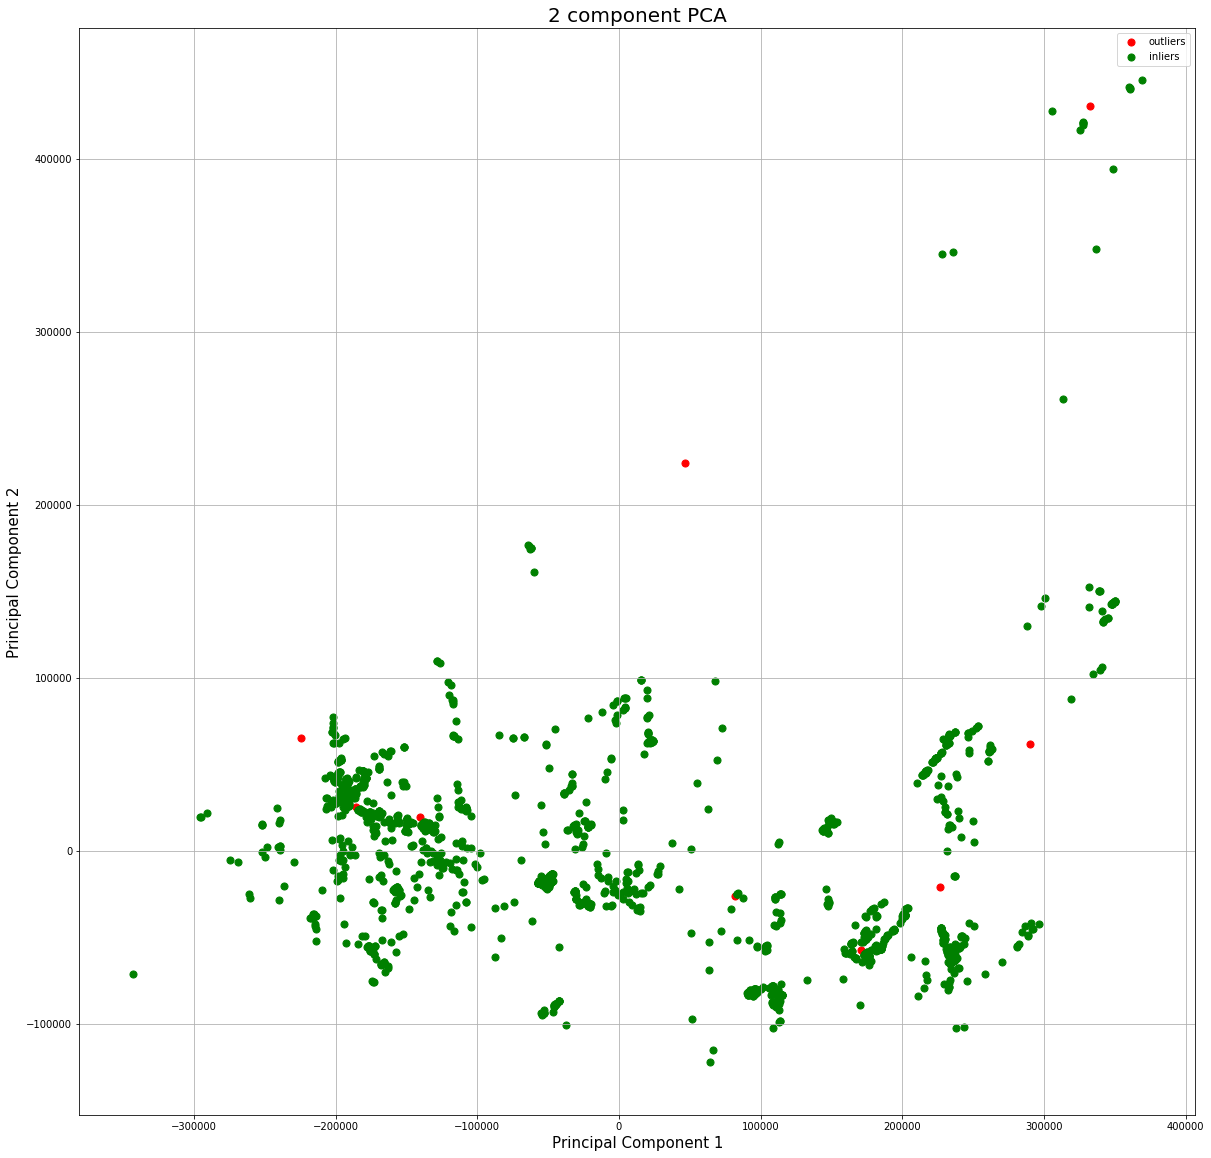

In [35]:
finalDf = pd.concat([principalDf, temp[['target']]], axis = 1)
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['outliers', 'inliers']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [36]:
data = pd.concat([outliers3, inliers3])

In [37]:
data = data.sort_index()

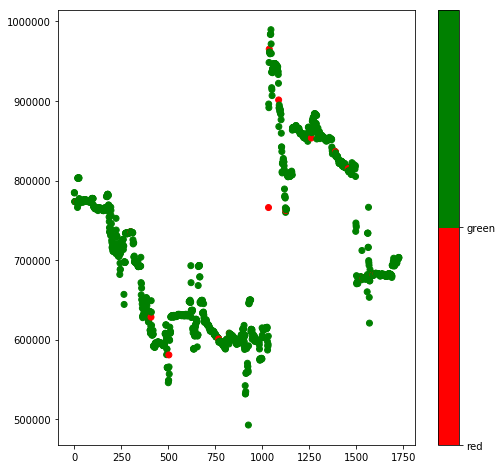

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

y = data.iloc[:,0]
x = range(len(data))
label = data.iloc[:,-1] == 'inliers'
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

In [1094]:
outliers3.sort_index()

,0,1,2,3,4,5,k distances,local outlier factor,target
151,755016,337676,19.944600,0.000000,417340,795532,655.891171,79.866645,outliers
165,755836,337180,21.505377,0.268817,418656,794712,48.498202,11.042036,outliers
309,743484,335784,18.232044,0.000000,407700,807064,161.152822,54.576440,outliers
337,743500,335636,19.780220,0.000000,407864,807048,135.233143,44.842766,outliers
383,756188,363840,19.680851,0.000000,392348,794360,131.636129,22.033880,outliers
404,756492,356976,23.369566,0.271739,399640,794056,118.466588,30.056625,outliers
405,756456,356860,22.788204,0.000000,399596,794092,90.071356,21.430297,outliers
411,756592,356488,19.283747,0.000000,400104,793956,600.360257,176.450251,outliers
412,757280,357184,23.636364,0.000000,400096,793268,109.039134,10.994281,outliers
417,757124,357020,25.252525,0.000000,400104,793424,161.755102,5.645271,outliers
